In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# generating 10k "events" (vals between 1 and 2 ), distribution is gaussian (hence "normal" in random)
data = np.random.normal(1,2,10000)
'''
# creating a 2d array of events and weights
weights here are generated to create a double peaked gaussian, what we would see for an SM vs EFT histogram.
does this by chosing smaller values between (-0.5,0.5) (lim(random) = 0.5), whereas vals a re (0.5,1.5) outside of this interval
'''
data = np.array([[x, np.random.uniform(0,0.5) if x<0.5 and x >-0.5 else np.random.uniform(0.5,1.5)] for x in data])

(array([ 462.,  527.,  508., 1032., 1236., 1282., 1233., 1256., 1208.,
        1256.]),
 array([9.26920321e-05, 1.50078536e-01, 3.00064379e-01, 4.50050223e-01,
        6.00036067e-01, 7.50021910e-01, 9.00007754e-01, 1.04999360e+00,
        1.19997944e+00, 1.34996529e+00, 1.49995113e+00]),
 <BarContainer object of 10 artists>)

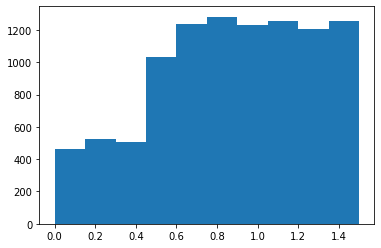

In [13]:
plt.hist(data[:,1])

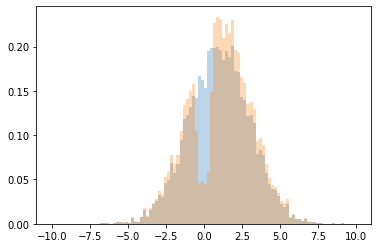

In [14]:
# bins
bins = np.linspace(-10,10,101)
#plotting data
_=plt.hist(data[:,0], bins=bins, alpha=0.3, density=True)
#plotting data * weights
_=plt.hist(data[:,0], bins=bins, weights=data[:,1], alpha=0.3, density=True)

'''
here we see the double gaussian shape that we would expect
'''

In [15]:
pseudodata = np.random.choice(data[:,0], size=100000, replace=True, p=data[:,1]/data[:,1].sum())


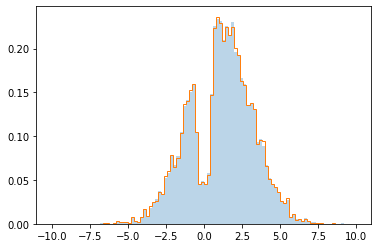

In [16]:
_=plt.hist(data[:,0], bins=bins, alpha=0.3, density=True, weights=data[:,1])
_=plt.hist(pseudodata, bins=bins, histtype='step', density=True)

In [17]:
sampled_points = np.array([])

In [18]:
def unweight(data, current_points):
    rndm = np.random.uniform(0,1,10000) * max(data[:,1])
    selected = np.where(rndm<data[:,1])[0]
    current_points = np.append(current_points, data[selected,0])
    return current_points

In [19]:
sampled_points = unweight(data, sampled_points)

In [25]:
while sampled_points.size < 200000:
    sampled_points = unweight(data, sampled_points)

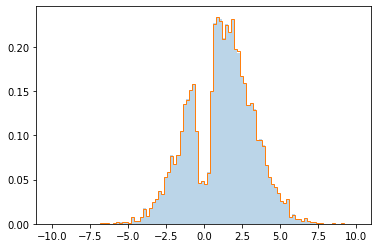

In [26]:
_=plt.hist(data[:,0], bins=bins, alpha=0.3, density=True, weights=data[:,1])
_=plt.hist(sampled_points, bins=bins, histtype='step', density=True)

In [23]:
sampled_points.size

23409